Text(0.5, 1.0, 'Image label: 1')

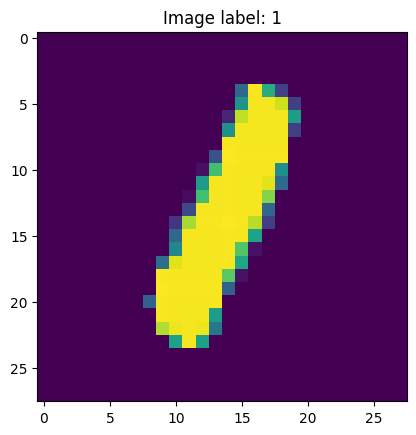

In [2]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

from tqdm import tqdm

# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        if x.dim() == 2:
            x = x.view(-1, 1, 28, 28)
    
        x = self.pool(F.relu(self.conv1(x)))  # (B, 32, 14, 14)
        x = self.pool(F.relu(self.conv2(x)))  # (B, 64, 7, 7)
        x = x.view(-1, 64 * 7 * 7)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Создаем модель
model = CNN()

## Обучаем модель

In [4]:
# Определяем оптимизатор и функцию потерь
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Обучение модели
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    train_tqdm = tqdm(train_data_loader, leave=True)
    for batch_i, (images, labels) in enumerate(train_tqdm, 1):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += (loss.item() / batch_i)
        train_tqdm.set_description(f'Epoch {epoch+1}, Loss: {running_loss:.4f}')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_data_loader):.4f}')


Epoch 1, Loss: 10.7494: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:40<00:00, 46.44it/s]


Epoch [1/5], Loss: 0.0057


Epoch 2, Loss: 0.9451: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:40<00:00, 45.79it/s]


Epoch [2/5], Loss: 0.0005


Epoch 3, Loss: 0.5694: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:40<00:00, 45.82it/s]


Epoch [3/5], Loss: 0.0003


Epoch 4, Loss: 0.4382: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:41<00:00, 45.61it/s]


Epoch [4/5], Loss: 0.0002


Epoch 5, Loss: 0.5199: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:39<00:00, 47.65it/s]

Epoch [5/5], Loss: 0.0003


## Проверяем на train выборке 

In [10]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

print(f'Accuracy on train set: {train_acc*100}%')

Accuracy on train set: 99.53500366210938%


## Проверяем на test выборке

In [11]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

print(f'Accuracy on train set: {train_acc*100}%')

Accuracy on train set: 99.06999969482422%
